In [ ]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from skimage.color import rgba2rgb
from skimage.restoration import denoise_wavelet

# **Denoising**
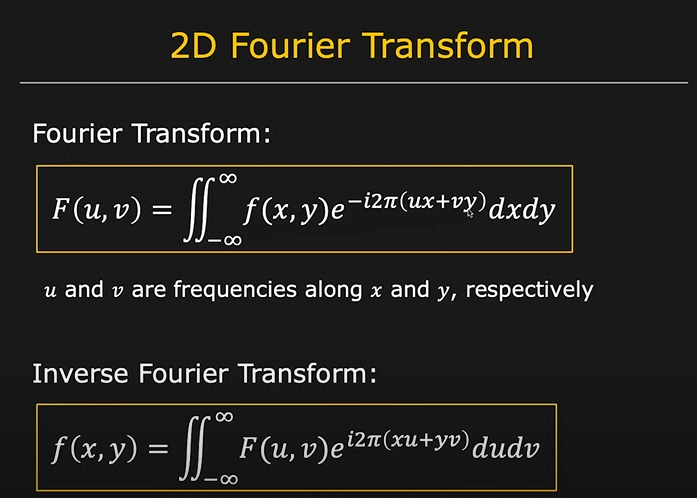

## Grey Scale

Text(0.5, 1.0, 'Orginal Image')

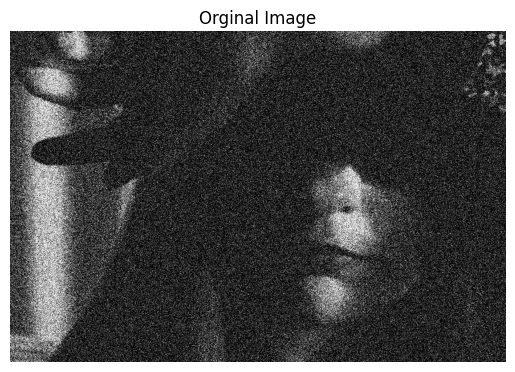

In [ ]:
grayImg = io.imread("gryscale.jpg")
grayImg = grayImg[:,:,0]
plt.imshow(grayImg, cmap = 'gray')
plt.axis('off')
plt.title("Orginal Image")

Text(0.5, 1.0, 'Frequency map')

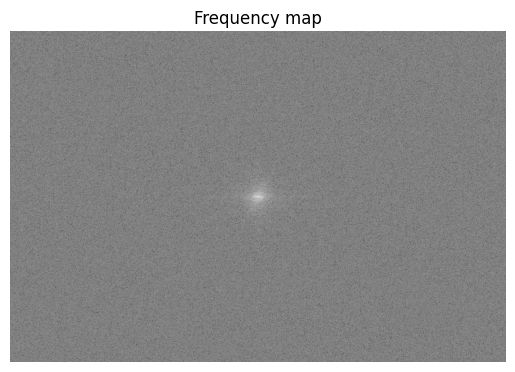

In [ ]:
grayImgTransform = np.fft.fft2(grayImg)
grayImgTransform = np.fft.fftshift(grayImgTransform)
plt.imshow(np.log(np.abs(grayImgTransform)),cmap = 'gray')
plt.axis('off')
plt.title("Frequency map")

Text(0.5, 1.0, 'Mask')

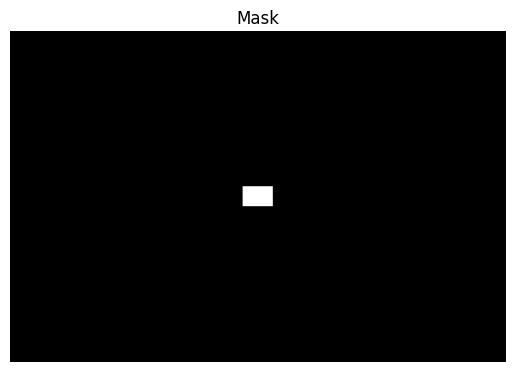

In [ ]:
keep_fraction = 0.03
y, x = grayImgTransform.shape
mask = np.zeros((y, x))
mask[int((y//2)-(y*keep_fraction)):int((y//2)+(y*keep_fraction)), int((x//2)-(x*keep_fraction)):int((x//2)+(x*keep_fraction))] = 1

plt.imshow(mask, cmap = 'gray')
plt.axis('off')
plt.title("Mask")

<ipython-input-25-0d2ccec190b5>:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(grayImgTransform)),cmap = 'gray')


Text(0.5, 1.0, 'Frequency map * mask')

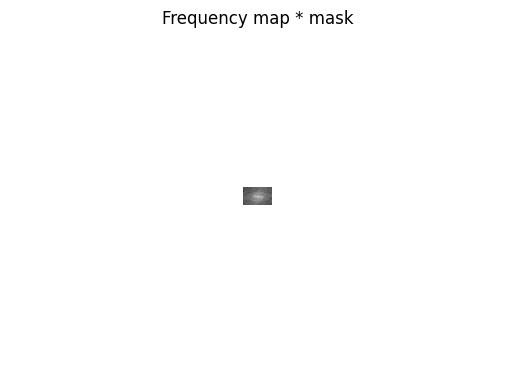

In [ ]:
grayImgTransform = grayImgTransform * mask
plt.imshow(np.log(np.abs(grayImgTransform)),cmap = 'gray')
plt.axis('off')
plt.title("Frequency map * mask")

Text(0.5, 1.0, 'Denoised image')

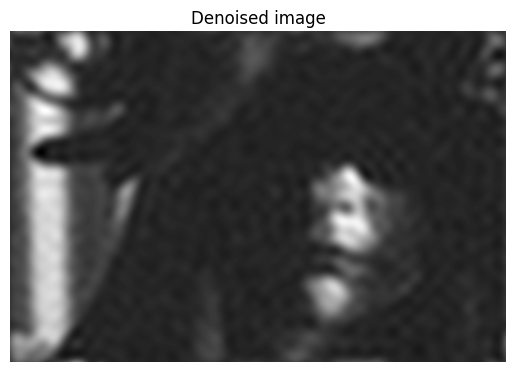

In [ ]:
f_ishift = np.fft.ifftshift(grayImgTransform)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')
plt.axis('off')
plt.title("Denoised image")

## Color Image

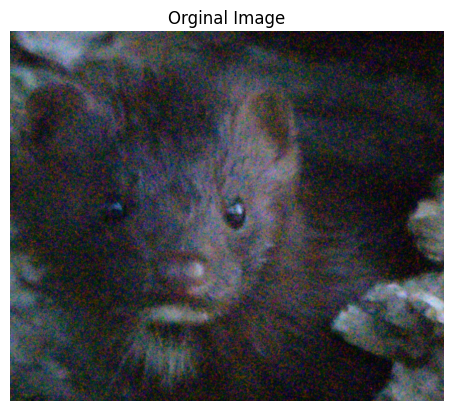

In [ ]:
colorImg = io.imread("kolorSzum.jpg")
y, x, chanels = colorImg.shape
plt.imshow(colorImg)
plt.axis('off')
plt.title("Orginal Image")

redChanel = colorImg[:,:,0]
greenChanel = colorImg[:,:,1]
blueChanel = colorImg[:,:,2]

(<Axes: title={'center': 'Blue Frequency map'}>,
 Text(0.5, 1.0, 'Blue Frequency map'))

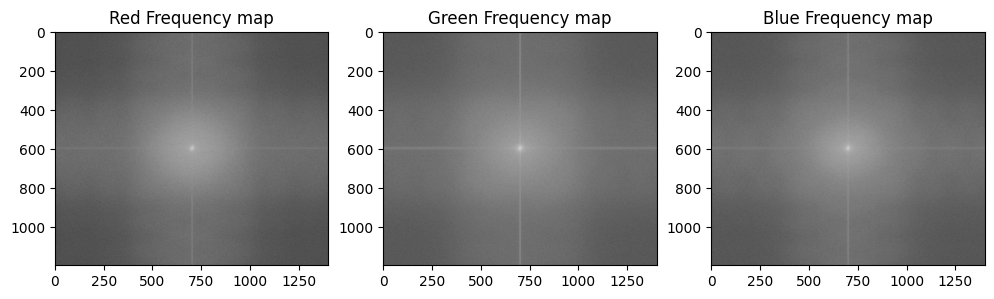

In [ ]:
redChanelF = np.fft.fft2(redChanel)
redChanelToPlot = np.fft.fftshift(redChanelF)

greenChanelF = np.fft.fft2(greenChanel)
greenChanelToPlot = np.fft.fftshift(greenChanelF)

blueChanelF = np.fft.fft2(blueChanel)
blueChanelToPlot  = np.fft.fftshift(blueChanelF)

plt.figure(figsize=(12, 4))

plt.subplot(131), plt.imshow(np.log(np.abs(redChanelToPlot)),cmap = 'gray'), plt.title('Red Frequency map')
plt.subplot(132), plt.imshow(np.log(np.abs(greenChanelToPlot)),cmap = 'gray'), plt.title('Green Frequency map')
plt.subplot(133), plt.imshow(np.log(np.abs(blueChanelToPlot)),cmap = 'gray'), plt.title('Blue Frequency map')

Text(0.5, 1.0, 'Mask')

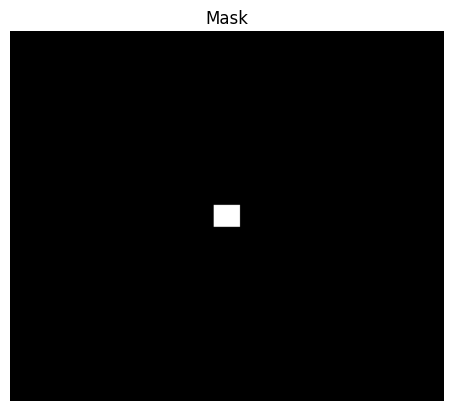

In [ ]:
keep_fraction = 0.03
mask = np.zeros((y, x))
mask[int((y//2)-(y*keep_fraction)):int((y//2)+(y*keep_fraction)), int((x//2)-(x*keep_fraction)):int((x//2)+(x*keep_fraction))] = 1

plt.imshow(mask, cmap = 'gray')
plt.axis('off')
plt.title("Mask")

<ipython-input-30-b66c3797b7e2>:6: RuntimeWarning: divide by zero encountered in log
  plt.subplot(131), plt.imshow(np.log(np.abs(redChanelM)),cmap = 'gray'), plt.title('Red Frequency map * mask')
<ipython-input-30-b66c3797b7e2>:7: RuntimeWarning: divide by zero encountered in log
  plt.subplot(132), plt.imshow(np.log(np.abs(greenChanelM)),cmap = 'gray'), plt.title('Green Frequency map * mask')
<ipython-input-30-b66c3797b7e2>:8: RuntimeWarning: divide by zero encountered in log
  plt.subplot(133), plt.imshow(np.log(np.abs(blueChanelM)),cmap = 'gray'), plt.title('Blue Frequency map * mask')


(<Axes: title={'center': 'Blue Frequency map * mask'}>,
 Text(0.5, 1.0, 'Blue Frequency map * mask'))

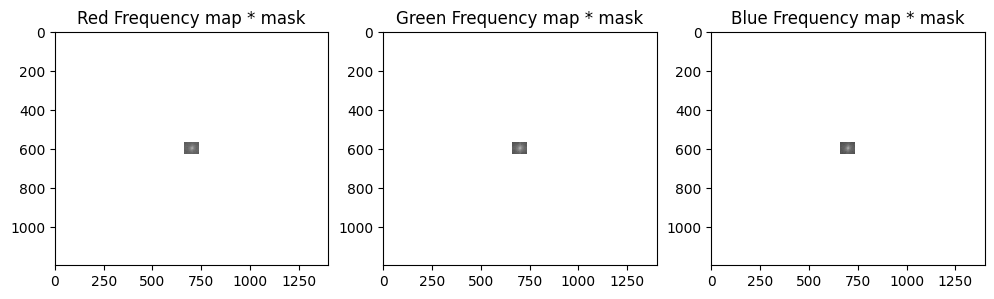

In [ ]:
redChanelM = redChanelToPlot*mask
greenChanelM = greenChanelToPlot*mask
blueChanelM = blueChanelToPlot*mask
plt.figure(figsize=(12, 4))

plt.subplot(131), plt.imshow(np.log(np.abs(redChanelM)),cmap = 'gray'), plt.title('Red Frequency map * mask')
plt.subplot(132), plt.imshow(np.log(np.abs(greenChanelM)),cmap = 'gray'), plt.title('Green Frequency map * mask')
plt.subplot(133), plt.imshow(np.log(np.abs(blueChanelM)),cmap = 'gray'), plt.title('Blue Frequency map * mask')

Text(0.5, 1.0, 'Denoised image')

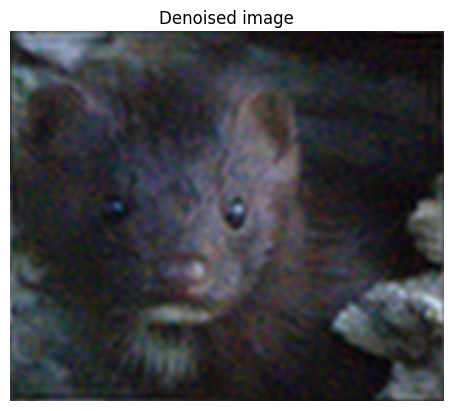

In [ ]:
f_iRedChanel = np.fft.ifftshift(redChanelM)
backRedChanel = np.fft.ifft2(f_iRedChanel)
backRedChanel = np.abs(backRedChanel)

f_iGreenChanel = np.fft.ifftshift(greenChanelM)
backGreenChanel = np.fft.ifft2(f_iGreenChanel)
backGreenChanel = np.abs(backGreenChanel)

f_iBlueChanel = np.fft.ifftshift(blueChanelM)
backBlueChanel = np.fft.ifft2(f_iBlueChanel)
backBlueChanel = np.abs(backBlueChanel)
colorImgBack = np.dstack([backRedChanel, backGreenChanel, backBlueChanel])
colorImgBack = colorImgBack.astype(int)

plt.imshow(colorImgBack)
plt.axis('off')
plt.title("Denoised image")

## Wavelet transform

<ipython-input-32-a8af31eae700>:1: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_wavelet(grayImg, wavelet='db1', mode='soft', multichannel=False)


(-0.5, 869.5, 579.5, -0.5)

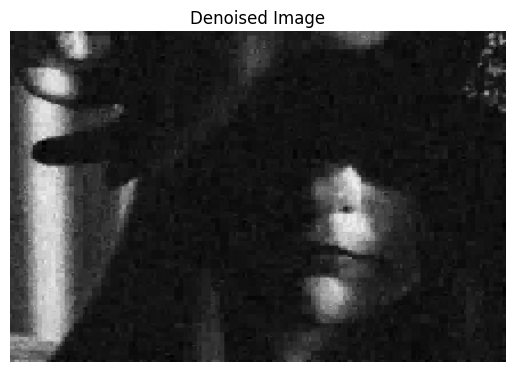

In [ ]:
denoised_image = denoise_wavelet(grayImg, wavelet='db1', mode='soft', multichannel=False)

plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

## Gausian Blur
w zależności od parametru sigma rozmiar rozmycia się zwiększa

Text(0.5, 1.0, 'Gausian Blur')

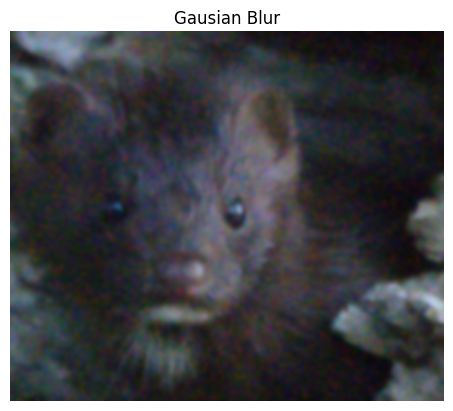

In [ ]:
sigma = 6
blurred_img = cv2.GaussianBlur(colorImg, (0, 0), sigmaX=sigma, sigmaY=sigma)
plt.imshow(blurred_img)
plt.axis('off')
plt.title("Gausian Blur")

# **Compression**
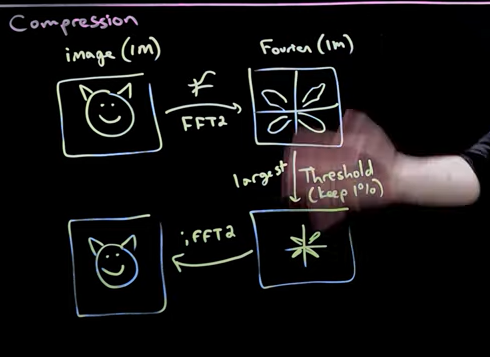


Transformacja Fouriera zamienia obraz z reprezentacji przestrzennej (położenie pikseli) na reprezentację częstotliwościową. Pokazuje, jak różne częstotliwości są obecne w obrazie.

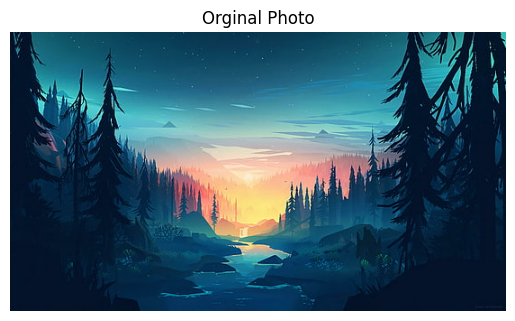

In [ ]:
imageToCompres = io.imread("test.jpg")
y, x, chanels = imageToCompres.shape

plt.imshow(imageToCompres)
plt.axis('off')
plt.title("Orginal Photo")

redChanelCom = imageToCompres[:,:,0]
greenChanelCom = imageToCompres[:,:,1]
blueChanelCom = imageToCompres[:,:,2]

(<Axes: title={'center': 'Blue Frequency map'}>,
 Text(0.5, 1.0, 'Blue Frequency map'))

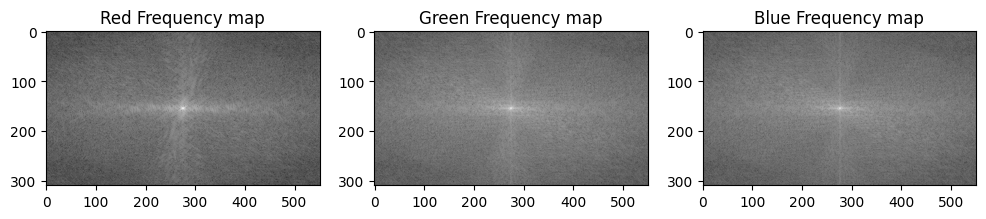

In [ ]:
redChanelFCom = np.fft.fft2(redChanelCom)
redChanelToPlotCom = np.fft.fftshift(redChanelFCom)

greenChanelFCom = np.fft.fft2(greenChanelCom)
greenChanelToPlotCom = np.fft.fftshift(greenChanelFCom)

blueChanelFCom = np.fft.fft2(blueChanelCom)
blueChanelToPlotCom  = np.fft.fftshift(blueChanelFCom)

plt.figure(figsize=(12, 4))

plt.subplot(131), plt.imshow(np.log(np.abs(redChanelToPlotCom)),cmap = 'gray'), plt.title('Red Frequency map')
plt.subplot(132), plt.imshow(np.log(np.abs(greenChanelToPlotCom)),cmap = 'gray'), plt.title('Green Frequency map')
plt.subplot(133), plt.imshow(np.log(np.abs(blueChanelToPlotCom)),cmap = 'gray'), plt.title('Blue Frequency map')

Text(0.5, 1.0, 'Mask')

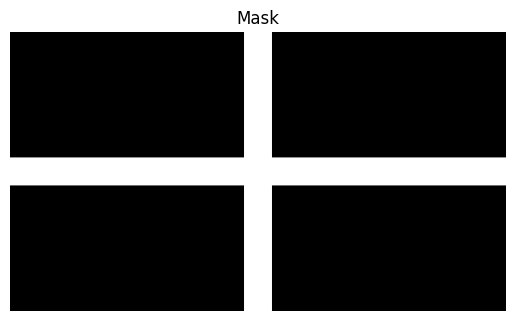

In [ ]:
keep_fractionCom = 0.01
def create_cross_mask(y, x, cross_width):
    maskCom = np.zeros((y, x))
    half_width = cross_width // 2

    maskCom[:, x // 2 - half_width:x // 2 + half_width + 1] = 1
    maskCom[y // 2 - half_width:y // 2 + half_width + 1, :] = 1
    return maskCom

maskCom = create_cross_mask(y, x, 30)
plt.imshow(maskCom, cmap = 'gray')
plt.axis('off')
plt.title("Mask")


<ipython-input-37-94702ba1138f>:8: RuntimeWarning: divide by zero encountered in log
  plt.subplot(131), plt.imshow(np.log(np.abs(redChanelMCom)),cmap = 'gray'), plt.title('Red Frequency map * mask')
<ipython-input-37-94702ba1138f>:9: RuntimeWarning: divide by zero encountered in log
  plt.subplot(132), plt.imshow(np.log(np.abs(greenChanelMCom)),cmap = 'gray'), plt.title('Green Frequency map * mask')
<ipython-input-37-94702ba1138f>:10: RuntimeWarning: divide by zero encountered in log
  plt.subplot(133), plt.imshow(np.log(np.abs(blueChanelMCom)),cmap = 'gray'), plt.title('Blue Frequency map * mask')


(<Axes: title={'center': 'Blue Frequency map * mask'}>,
 Text(0.5, 1.0, 'Blue Frequency map * mask'))

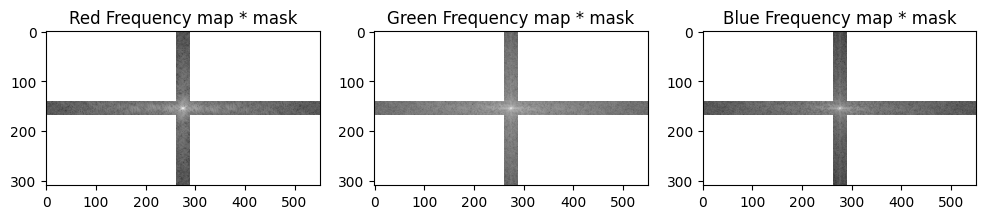

In [ ]:
redChanelMCom = redChanelToPlotCom*maskCom
greenChanelMCom = greenChanelToPlotCom*maskCom
blueChanelMCom = blueChanelToPlotCom*maskCom

plt.figure(figsize=(12, 4))


plt.subplot(131), plt.imshow(np.log(np.abs(redChanelMCom)),cmap = 'gray'), plt.title('Red Frequency map * mask')
plt.subplot(132), plt.imshow(np.log(np.abs(greenChanelMCom)),cmap = 'gray'), plt.title('Green Frequency map * mask')
plt.subplot(133), plt.imshow(np.log(np.abs(blueChanelMCom)),cmap = 'gray'), plt.title('Blue Frequency map * mask')

Text(0.5, 1.0, 'Compression image')

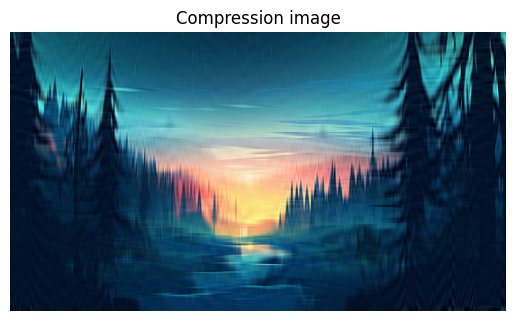

In [ ]:
f_iRedChanelCom = np.fft.ifftshift(redChanelMCom)
backRedChanelCom = np.fft.ifft2(f_iRedChanelCom)
backRedChanelCom = np.abs(backRedChanelCom)


f_iGreenChanelCom = np.fft.ifftshift(greenChanelMCom)
backGreenChanelCom = np.fft.ifft2(f_iGreenChanelCom)
backGreenChanelCom = np.abs(backGreenChanelCom)

f_iBlueChanelCom = np.fft.ifftshift(blueChanelMCom)
backBlueChanelCom = np.fft.ifft2(f_iBlueChanelCom)
backBlueChanelCom = np.abs(backBlueChanelCom)

colorImgBackCom = np.dstack([backRedChanelCom.astype(int), backGreenChanelCom.astype(int), backBlueChanelCom.astype(int)])
colorImgBackCom = colorImgBackCom.astype(int)

plt.imshow(colorImgBackCom)
plt.axis('off')
plt.title("Compression image")

## Wavelet compression

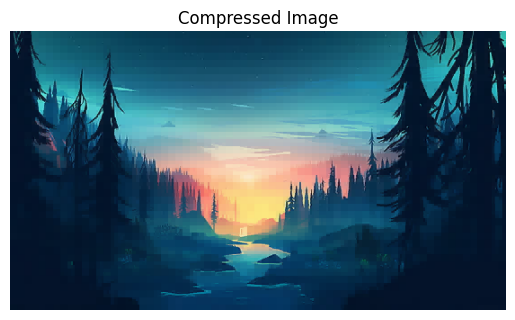

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage import io

def wavelet_compress_color_image(image, wavelet='haar', level=3, threshold=20):
    compressed_image = []
    for i in range(3):  # Przetwarzanie każdego kanału kolorów osobno
        coeffs = pywt.wavedec2(image[:, :, i], wavelet, level=level)
        coeffs_thresh = [coeffs[0]] + [(pywt.threshold(cH, threshold, mode='soft'),
                                        pywt.threshold(cV, threshold, mode='soft'),
                                        pywt.threshold(cD, threshold, mode='soft')) for cH, cV, cD in coeffs[1:]]
        compressed_image.append(pywt.waverec2(coeffs_thresh, wavelet))
    return np.dstack(compressed_image)

image_path = io.imread('test.jpg')
compressed_image = wavelet_compress_color_image(image_path)

# Upewnijmy się, że wartości pikseli mieszczą się w zakresie 0-255
compressed_image = np.clip(compressed_image, 0, 255)

plt.imshow(compressed_image.astype(np.uint8))
plt.title('Compressed Image')
plt.axis('off')
plt.show()